# Intro to Deep Learning Final Project: Predicting Customer Churn

# Purpose

The purpose of this project is to utilize Artificial Neural Networks to monitor and predict whether a customer will keep continue to use the company's services or take their business elsewhere. This information would be vital to the company's business planning to help determine where internal resources would be best distributed to and to proactively understand what relationships may need nuturing. The dataset consists of records for 10,000 customers that were previously classified as churned away from the company's services or remained. 

Artificial Neural Networks have 3 layers that are fully connected:
1. Input Layer
    * This is where data (independent variables to be normalized) is first passed throug
2. Hidden Layer
    * Certain operations are performed on the data (Weighted Sum + Activation Functions)
3. Output Layer
    * Output value is received from here. In this case, it will be a binary classification


This data is taken from a [kaggle dataset page](https://www.kaggle.com/datasets/shubh0799/churn-modelling) and the model's performance was evaluated by Accuracy and F1-score metrics.

Data files and saved models can be found in the following [GitHub Repo](https://github.com/ancr8790/CustomerChurn_ANN)

The dataset has the following attributes:
* RowNumber: The number of the row, used for indexing
* CustomerId: The unique customer ID
* Surname: Customer's last name
* CreditScore: Customer's Credit Score
* Geography: Country of residence
* Gender
* Age
* Tenure: The time of bond with company
* Balance: Amount left with them
* NumOfProducts: Products customers own
* HasCrCard: Indication if customer has a creditcard
* IsActiveMember: Indication if customer is active member of company
* EstimatedSalary: estimated yearly salary of customer
* Exited: indication whether the customer

## Import necessary libraries

In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import keras

In [138]:
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import recall_score, precision_score

from keras import regularizers
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D, AvgPool2D
from keras.layers import BatchNormalization
from keras.layers import LeakyReLU, ReLU

In [91]:
#check current directory, change if necessary
parent_path = "/Users/andreacruz/Documents/University of Colorado, Boulder MSDS/Machine Learning/Intro to Deep Learning/Week 6"
os.chdir(parent_path)
print(os.getcwd())

/Users/andreacruz/Documents/University of Colorado, Boulder MSDS/Machine Learning/Intro to Deep Learning/Week 6


## Import data

In [92]:
#Import data from csv file
churn_train = pd.read_csv('Churn_Modelling.csv')
#display first 5 rows to confirm
print("Churn data")
display(churn_train.head(5))

Churn data


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [93]:
churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Here we see that the data file has 14 attributes and 10,000 records. Let's take a closer look at each attribute and make sure there aren't any null values.

In [94]:
churn_train.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [95]:
churn_train.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


From this discription we can make the following observations:
* There are 3 binary coded attributes
    * HasCrCard
    * IsActiveMember
    * Exited (target attribute)
* On average:
    * Customer's credit score is relatively high (650)
    * Customer's are typically in their 30s-40s
    * Customer's have been with the company for ~ 5 years
    * Have an avg salary of $100,000

Additionally, the exited attribute has a mean of 0.2 which indicates an unbalanced dataset, favoring the 0 option(stayed with the company). Let's take a closer look at this distribution to form approach for training the future model.

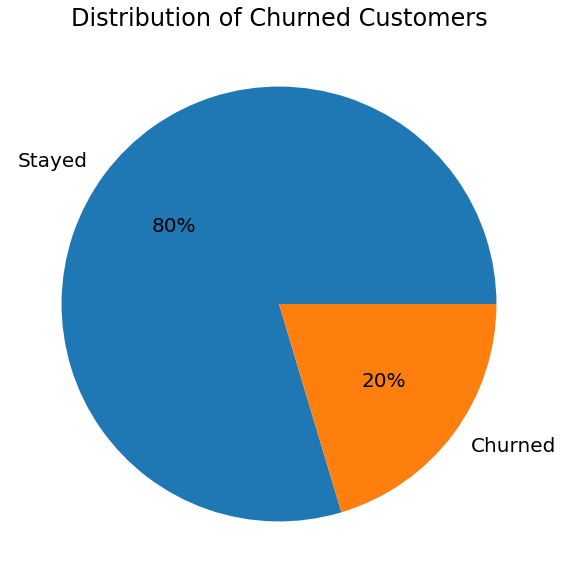

Exited
0    7963
1    2037
Name: count, dtype: int64


In [96]:
fig,ax = plt.subplots(figsize = (10,10))
plt.rc('font', size=20) 
plt.pie(churn_train.Exited.value_counts(normalize = True), labels = ["Stayed","Churned"], autopct = '%1.0f%%')
plt.title("Distribution of Churned Customers")
plt.show()

print(churn_train.Exited.value_counts())

As confirmed, the distribution of the Exited attribute is heavily skewed in the "stayed with company" direction. Actions going forward we can put in place to account for this is to undersample from the 0 category or alternatively evaluate the model's performance with additional metrics outside of accuracy.

Let's also take a look at the distribution of the other attributes in relation to the target attribute to see if there are any obvious correlations.

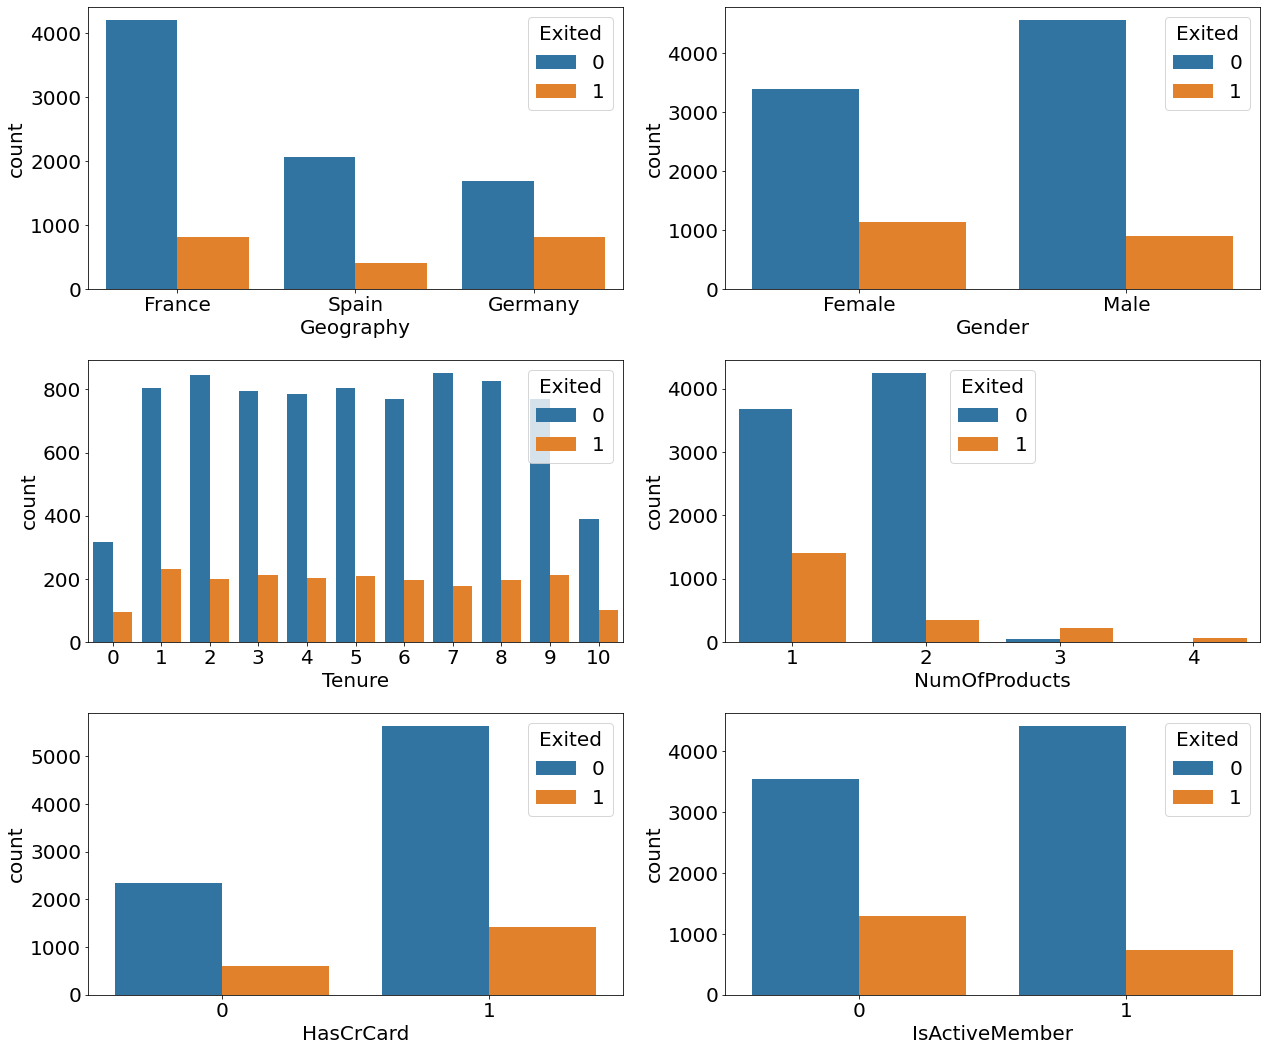

In [97]:
# visualizing categorical variables

fig, ax = plt.subplots(3, 2, figsize = (18, 15))

sns.countplot('Geography', hue = 'Exited', data = churn_train, ax = ax[0][0])
sns.countplot('Gender', hue = 'Exited', data = churn_train, ax = ax[0][1])
sns.countplot('Tenure', hue = 'Exited', data = churn_train, ax = ax[1][0])
sns.countplot('NumOfProducts', hue = 'Exited', data = churn_train, ax = ax[1][1])
sns.countplot('HasCrCard', hue = 'Exited', data = churn_train, ax = ax[2][0])
sns.countplot('IsActiveMember', hue = 'Exited', data = churn_train, ax = ax[2][1])

plt.tight_layout()
plt.show()

From these plots we can observe that:
* Most of the customers are:
    * from France
    * Male
    * have been with the company 1-9 years
    * own 1-2 products
    * have a credit card

* The proportion of churned customers in Germany is higher than the other two countries
* The proportion of female churned customers is higher than male customers
* More customers own 2 products but there is a higher churn rate in customers with only 1 product
* Expectedly, the inactive member group has a higher proportion of churn compared to active member group

Let's take a look at the categorical variables next

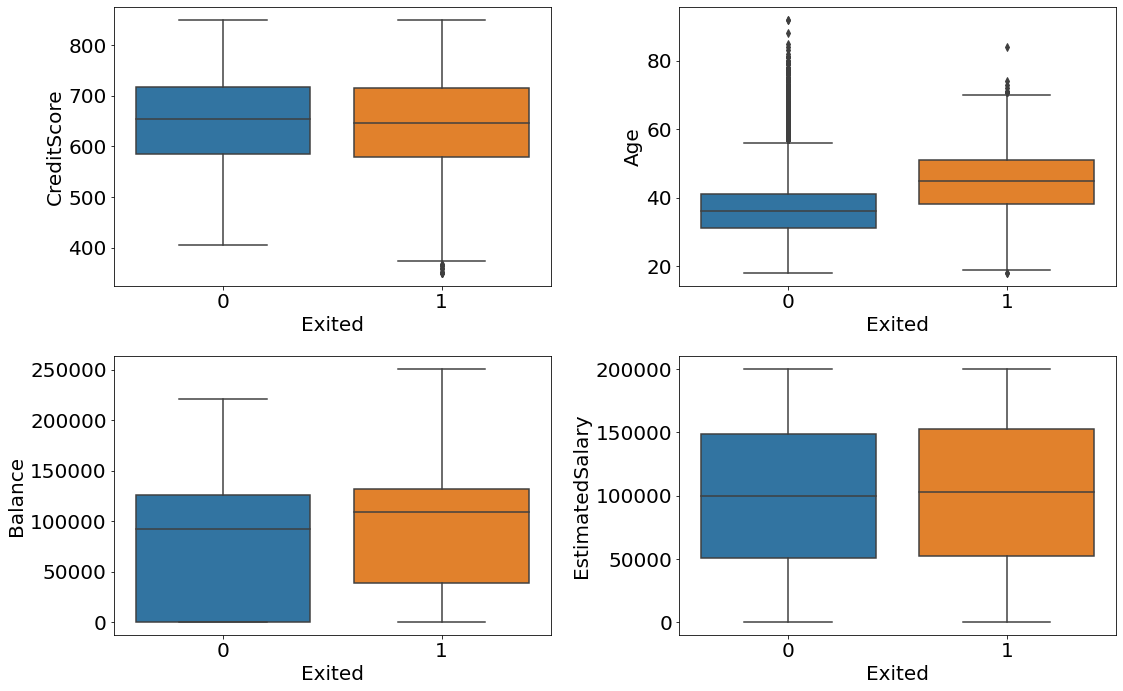

In [98]:
# visualizing continuous variables

fig, ax = plt.subplots(2, 2, figsize = (16, 10))

sns.boxplot(x = 'Exited', y = 'CreditScore', data = churn_train, ax = ax[0][0])
sns.boxplot(x = 'Exited', y = 'Age', data = churn_train, ax = ax[0][1])
sns.boxplot(x = 'Exited', y = 'Balance', data = churn_train, ax = ax[1][0])
sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = churn_train, ax = ax[1][1])

plt.tight_layout()
plt.show()

Comparing these attributes to the target attributes, the following conclusions were made:
* Credit score was consistent among churned and retained customers
* Exoectedly, due to larger sample size in retained customers set, their age on average is lower than the churned customer group but with high variability
* Similar observation regarding available balance. 
* Surprisingly, the estimated salary doesn't seem to have any correlation for groups since it was nearly identical for both groups. 
    * This could speak to the retained customers faith in bank company's security or are comfortable in their lifestyles so feel more inclined to spend and not save as much.

Based on all this EDA, the following conclusions have been made:
* There is a substantial amount of training data to work with (10,000)
* The data set is heavily skewed toward the retained customer group(80/20)
    * Could undersample from retained customer group and perform some data augmentation to artificially increase available data while maintaining balance
    * Could evaluate with metrics aside from accuracy
* The data needs to be split into a training and validation dataset.
* The target attribute (Exited) only has 2 unique values, therefore a binary classification model will be built

The plan for the initial model implementation will be as follows:
* Split data into a 80/20 Training/Validation set
    * Create split set with original distribution
    * Create split set with 50/50 distribution
* Set up ANN architecture with initial hyperparameters
* Train ANN with training data to make predictions
* Evaluate ANN predictions with training labels 
    * Plot accuracy and loss functions
    * Display F1 and ROC AUC metrics
* Run ANN on Validation Data
* Iterate through tuning hyperparameters and/or different architectures to increase performance


## Data Preprocessing



First I will drop the "RowNumber" and "Surname" column since we already have a unique observation identifier in "CustomerId"

In [99]:
#churn_train = pd.read_csv('Churn_Modelling.csv')
churn_train = churn_train.drop(['RowNumber','Surname'], axis = 1)
churn_train.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

Next, let's hot one encode the non-numerical categorical attributes: Geography and Gender. Since Gender has binary outputs, no additional work was needed other that label encoding. Because Geography has 3 unique values, it was One hot encoded.

In [100]:
churn_train['Gender']=churn_train['Gender'].map({'Female': 0, 'Male':1})
churn_train.Gender.unique()


array([0, 1])

In [101]:
lb_enc = LabelEncoder()
oneHE = OneHotEncoder()
col_to_enc = churn_train['Geography'].values.reshape(-1,1)
oneHE_data = oneHE.fit_transform(col_to_enc).toarray()
encoded_df = pd.DataFrame(oneHE_data, columns=[f"Geo_{category}" for category in oneHE.categories_[0]])
churn_train = pd.concat([churn_train.drop(['Geography'], axis=1).reset_index(drop=True), encoded_df], axis=1)
churn_train.head(5)

,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
0,15634602,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,15647311,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,15619304,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,15701354,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,15737888,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


let's split up the Churn dataset with an 80/20 set up. I will create one set with the original distribution in tact of 80/20 retained/churned customers and another with a 50/50 distribution. The 50/50 split count will be based on the total observations of churned customers (2037). 

In [102]:
churn_tot = churn_train.Exited.sum()
print("Total Churned Observations:",churn_tot )
split_80 = int(churn_tot*0.8)
split_20 = int(churn_tot*0.2)

print("80% of these churned observations (",split_80,") will go to the Training data")
print("20% of these churned observations (",split_20,") will go to the Validation data")

random_seed = 123
retain = churn_train[churn_train['Exited'] ==0]
churned = churn_train[churn_train['Exited'] ==1]
retain_samp = retain.sample(n = churn_tot, random_state = random_seed)
churn_bal = pd.concat([churned, retain_samp]).sample(frac=1, random_state=random_seed).reset_index(drop=True)

Total Churned Observations: 2037
80% of these churned observations ( 1629 ) will go to the Training data
20% of these churned observations ( 407 ) will go to the Validation data


In [103]:
print("Confirming", retain.Exited.sum(), "Churned observations in retained data set of", len(retain), "observations")
print("Confirming",churned.Exited.sum(),"Churned observations in churned data set of", len(churned), "observations")
print(len(retain_samp), "observations were sampled from the retained dataset")

Confirming 0 Churned observations in retained data set of 7963 observations
Confirming 2037 Churned observations in churned data set of 2037 observations
2037 observations were sampled from the retained dataset


In [104]:
#determine distribution of class variable
print("Reduced Sample Dataset Class Distribution:")
print(churn_bal.Exited.value_counts(normalize = True))

Reduced Sample Dataset Class Distribution:
Exited
1    0.5
0    0.5
Name: proportion, dtype: float64


In [105]:
#split up labelled Train data 
X = churn_bal.loc[:,churn_bal.columns != 'Exited']
y = churn_bal['Exited']
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size = 0.20, random_state = random_seed,stratify = y)
# Print class distribution in the original dataset
print("Original Dataset Class Distribution:")
print(churn_bal.Exited.value_counts(normalize=True))

# Print class distribution in the training and validation sets
print("\nTraining Set Class Distribution:")
print(y_train.value_counts(normalize=True))

print("\nValidation Set Class Distribution:")
print(y_val.value_counts(normalize=True))

Original Dataset Class Distribution:
Exited
1    0.5
0    0.5
Name: proportion, dtype: float64

Training Set Class Distribution:
Exited
1    0.500153
0    0.499847
Name: proportion, dtype: float64

Validation Set Class Distribution:
Exited
0    0.500613
1    0.499387
Name: proportion, dtype: float64


In [ ]:
# #combined singular arrays into dataframe and confirm distributions
# df_ytrain = pd.DataFrame(y_train, columns = ['Exited'])
# churn_bal_train = X_train.copy()
# churn_bal_train['Exited'] = df_ytrain.values
# print("\nTraining Set Class Distribution:")
# print(churn_bal_train.Exited.value_counts(),churn_bal_train.Exited.value_counts(normalize=True))

# df_yval = pd.DataFrame(y_val, columns = ['Exited'])
# churn_bal_val = X_val.copy()
# churn_bal_val['Exited'] = df_yval.values
# print("\nValidation Set Class Distribution:")
# print(churn_bal_val.Exited.value_counts(),churn_bal_val.Exited.value_counts(normalize=True))

In [202]:
#split up labelled Train data 
X_skew = churn_train.loc[:,churn_bal.columns != 'Exited']
y_skew = churn_train['Exited']
X_sk_train, X_sk_val, y_sk_train, y_sk_val= train_test_split(X_skew, y_skew, test_size = 0.20, random_state = random_seed)
# Print class distribution in the original dataset
print("Original Dataset Class Distribution:")
print(churn_train.Exited.value_counts(normalize=True))

# Print class distribution in the training and validation sets
print("\nTraining Set Class Distribution:")
print(y_sk_train.value_counts(normalize=True))

print("\nValidation Set Class Distribution:")
print(y_sk_val.value_counts(normalize=True))

Original Dataset Class Distribution:
Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

Training Set Class Distribution:
Exited
0    0.797125
1    0.202875
Name: proportion, dtype: float64

Validation Set Class Distribution:
Exited
0    0.793
1    0.207
Name: proportion, dtype: float64


In [ ]:
# #create unbalanced dataset
# churn_train = pd.read_csv('Churn_Modelling.csv')
# churn_skew_train, churn_skew_val = train_test_split(churn_train, test_size = 0.20, random_state = random_seed)

# print("Skewed Training set Class distribution:")
# print(churn_skew_train.Exited.value_counts(),churn_skew_train.Exited.value_counts(normalize=True))

# print("Skewed Validation set Class distribution:")
# print(churn_skew_val.Exited.value_counts(),churn_skew_val.Exited.value_counts(normalize=True))

Lastly, we will need to standardize the independent attributes since they aren't all in the same scale and would otherwise cause difficulties for the model.

In [204]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_val = ss.transform(X_val)

ss_skew = StandardScaler()
X_sk_train = ss_skew.fit_transform(X_sk_train)
X_sk_val = ss_skew.transform(X_sk_val)

In [110]:
X_train

array([[ 1.43535456, -0.83876675, -1.02454162, ..., -0.93664516,
         1.52830677, -0.55099909],
       [ 1.33732229, -0.19869794,  0.97604624, ..., -0.93664516,
         1.52830677, -0.55099909],
       [ 0.49983248,  0.62424766, -1.02454162, ..., -0.93664516,
        -0.6543189 ,  1.81488502],
       ...,
       [ 0.94804493, -0.21901759, -1.02454162, ...,  1.06764018,
        -0.6543189 , -0.55099909],
       [ 1.57204317,  0.96968162, -1.02454162, ...,  1.06764018,
        -0.6543189 , -0.55099909],
       [-1.48865476,  1.02048073,  0.97604624, ...,  1.06764018,
        -0.6543189 , -0.55099909]])

# Model Architecture

As mentioned in the beginning of this notebook, I will be utilizing an artificial neural network architecture to implement a binary classification model. This ANN will consist of 3 high level sections: Input layer, Hidden Layer(s), and Output layer.

Multiple initial implementations were tested until the following architecture provided acceptable results. From there hyperparameter turning was performed. The first implementation that produced acceptable results had the following architecture:

* Input Layer
* 1 Hidden Layer
* Flatten layer
* 1 Output layer w/ final activation of Tanh

Compiled with Adam Optimizer, Binary crossentropy loss, and run for 30 epochs.

# Model 1

The implementation of this model was very simple with 3 base layers. In this iteration I also trained this structure on the balanced(but smaller quantity) dataset vs the unbalanced(larger) dataset. Unsurprisingly, the balanced dataset provided more desirable results with plateauing accuracy and loss functions. Moving forward I will use the balanced dataset in hyperparameter tuning. And because of the usage of the balanced dataset, all the typical evaluation metrics produce similar results, so for simplicity I will also move forward with using accuracy as the evalution metric.

In [121]:
model1 = Sequential(
    [#input layer
    Input(shape = (13,)),

    #hidden layer
    Dense(7, activation ='relu',  kernel_initializer = 'normal'),
    #can add normalization later

    #transition to Neural Network
    Flatten(),
    #output layer
    Dense(1, activation = 'tanh',  kernel_initializer = 'normal')
    ])

model1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 98        
                                                                 
 flatten_1 (Flatten)         (None, 7)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 106 (424.00 Byte)
Trainable params: 106 (424.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
ANN1_bal = model1.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val))

Epoch 1/30
102/102 [==============================] - 2s 5ms/step - loss: 1.7567 - accuracy: 0.4998 - val_loss: 1.2677 - val_accuracy: 0.5006
Epoch 2/30
102/102 [==============================] - 0s 3ms/step - loss: 1.1126 - accuracy: 0.4998 - val_loss: 1.0051 - val_accuracy: 0.5006
Epoch 3/30
102/102 [==============================] - 0s 4ms/step - loss: 0.9008 - accuracy: 0.4998 - val_loss: 0.8426 - val_accuracy: 0.5031
Epoch 4/30
102/102 [==============================] - 0s 4ms/step - loss: 0.7669 - accuracy: 0.5130 - val_loss: 0.7407 - val_accuracy: 0.5448
Epoch 5/30
102/102 [==============================] - 0s 3ms/step - loss: 0.6841 - accuracy: 0.5842 - val_loss: 0.6776 - val_accuracy: 0.5963
Epoch 6/30
102/102 [==============================] - 0s 3ms/step - loss: 0.6345 - accuracy: 0.6382 - val_loss: 0.6408 - val_accuracy: 0.6442
Epoch 7/30
102/102 [==============================] - 0s 4ms/step - loss: 0.6056 - accuracy: 0.6790 - val_loss: 0.6200 - val_accuracy: 0.6687
Epoch 

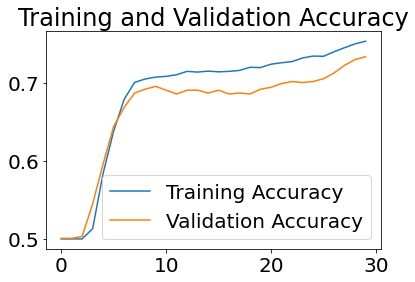

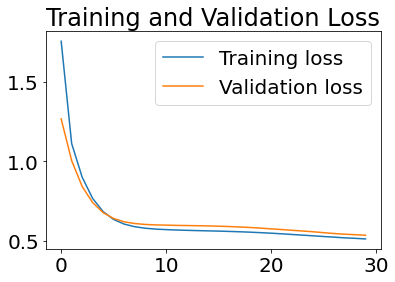

In [123]:
#summarize accuracy & loss

acc = ANN1_bal.history['accuracy']
val_acc = ANN1_bal.history['val_accuracy']

loss = ANN1_bal.history['loss']
val_loss = ANN1_bal.history['val_loss']
epochs = range(len(acc))

# ANN1_bal_data = {"epoch": epochs, "accuracy": acc, "validation accuracy": val_acc, "loss": loss, "validation loss": val_loss}
# ANN1_bal_training = pd.DataFrame(cnn1_data)
# ANN1_bal_training.to_csv('/kaggle/working/CNN1_training.csv',index=False)

#fig, axs = plt.subplots(2, figsize=(10, 10))
plt.rc('font', size=20) 
plt.plot(epochs, acc, label = "Training Accuracy"),
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_accuracy.png')
plt.show()
#axs[0,0] = plt.show()
plt.plot(epochs, loss, label = "Training loss"),
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_loss.png')
plt.show()

26/26 [==============================] - 0s 2ms/step


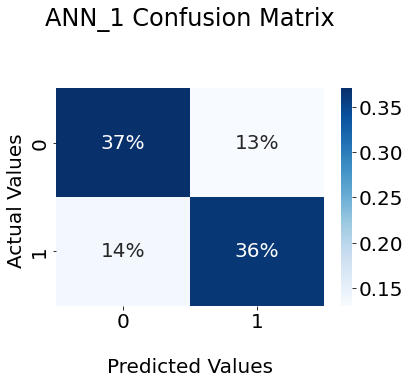

In [130]:
y_pred_ANN1 = model1.predict(X_val)
y_pred_ANN1 = (y_pred_ANN1> 0.5).astype(int)
#plotting Confusion Matrix
cf_matrix_ANN1 = confusion_matrix(y_val, y_pred_ANN1)


ax = sns.heatmap(cf_matrix_ANN1/np.sum(cf_matrix_ANN1), annot=True,fmt='.0%', cmap='Blues')
ax.set_title('ANN_1 Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [131]:
print('Accuracy Score : ' + str(round(accuracy_score(y_val,y_pred_ANN1),3)))
print('Precision Score : ' + str(round(precision_score(y_val,y_pred_ANN1),3)))
print('Recall Score : ' + str(round(recall_score(y_val,y_pred_ANN1),3)))
print('F-Score : ' + str(round(f1_score(y_val,y_pred_ANN1),3)))


Accuracy Score : 0.734
Precision Score : 0.736
Recall Score : 0.727
F-Score : 0.732


# Model 2

In this iteration, I implemented an additional hidden dense layer and trained for longer(50 epochs). This architecture increased accuracy by about 3%. Next, I will implement regularization layers to see if that will help with performance improvement.

In [132]:
model2 = Sequential(
    [#input layer
    Input(shape = (13,)),

    #hidden layer
    Dense(7, activation ='relu',  kernel_initializer = 'normal'),
    Dense(3, activation ='relu',  kernel_initializer = 'normal'),
    #can add normalization later

    #transition to Neural Network
    Flatten(),
    #output layer
    Dense(1, activation = 'tanh',  kernel_initializer = 'normal')
    ])

model2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 98        
                                                                 
 dense_5 (Dense)             (None, 3)                 24        
                                                                 
 flatten_2 (Flatten)         (None, 3)                 0         
                                                                 
 dense_6 (Dense)             (None, 1)                 4         
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [133]:
ANN2_bal = model2.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
102/102 [==============================] - 2s 5ms/step - loss: 2.4880 - accuracy: 0.4998 - val_loss: 2.1737 - val_accuracy: 0.5006
Epoch 2/50
102/102 [==============================] - 1s 5ms/step - loss: 1.8300 - accuracy: 0.4998 - val_loss: 1.4956 - val_accuracy: 0.5006
Epoch 3/50
102/102 [==============================] - 0s 4ms/step - loss: 1.2541 - accuracy: 0.4998 - val_loss: 1.0604 - val_accuracy: 0.5006
Epoch 4/50
102/102 [==============================] - 1s 5ms/step - loss: 0.9163 - accuracy: 0.4998 - val_loss: 0.8150 - val_accuracy: 0.5018
Epoch 5/50
102/102 [==============================] - 1s 11ms/step - loss: 0.7294 - accuracy: 0.5305 - val_loss: 0.6872 - val_accuracy: 0.5853
Epoch 6/50
102/102 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.6275 - val_loss: 0.6296 - val_accuracy: 0.6515
Epoch 7/50
102/102 [==============================] - 0s 4ms/step - loss: 0.5980 - accuracy: 0.6751 - val_loss: 0.6066 - val_accuracy: 0.6699
Epoch

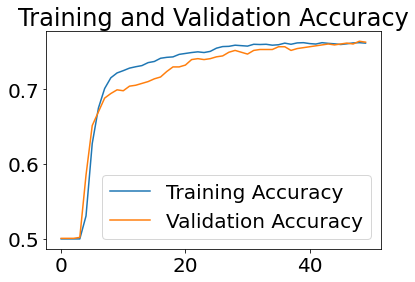

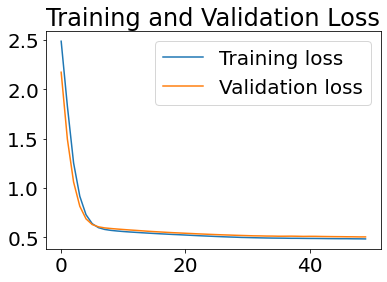

In [134]:
#summarize accuracy & loss

acc = ANN2_bal.history['accuracy']
val_acc = ANN2_bal.history['val_accuracy']

loss = ANN2_bal.history['loss']
val_loss = ANN2_bal.history['val_loss']
epochs = range(len(acc))

# ANN1_bal_data = {"epoch": epochs, "accuracy": acc, "validation accuracy": val_acc, "loss": loss, "validation loss": val_loss}
# ANN1_bal_training = pd.DataFrame(cnn1_data)
# ANN1_bal_training.to_csv('/kaggle/working/CNN1_training.csv',index=False)

#fig, axs = plt.subplots(2, figsize=(10, 10))
plt.rc('font', size=20) 
plt.plot(epochs, acc, label = "Training Accuracy"),
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_accuracy.png')
plt.show()
#axs[0,0] = plt.show()
plt.plot(epochs, loss, label = "Training loss"),
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_loss.png')
plt.show()

26/26 [==============================] - 0s 4ms/step


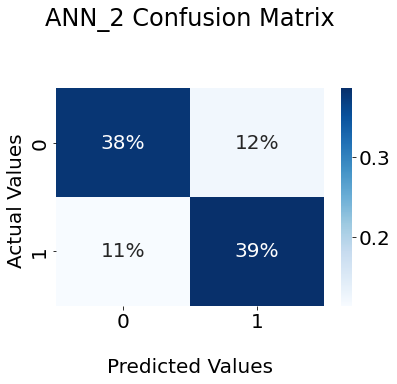

In [237]:
y_pred_ANN2 = model2.predict(X_val)
y_pred_ANN2 = (y_pred_ANN2> 0.5).astype(int)
#plotting Confusion Matrix
cf_matrix_ANN2 = confusion_matrix(y_val, y_pred_ANN2)


ax = sns.heatmap(cf_matrix_ANN2/np.sum(cf_matrix_ANN2), annot=True,fmt='.0%', cmap='Blues')
ax.set_title('ANN_2 Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()


In [136]:
print('Accuracy Score : ' + str(round(accuracy_score(y_val,y_pred_ANN2),3)))
print('Precision Score : ' + str(round(precision_score(y_val,y_pred_ANN2),3)))
print('Recall Score : ' + str(round(recall_score(y_val,y_pred_ANN2),3)))
print('F-Score : ' + str(round(f1_score(y_val,y_pred_ANN2),3)))


Accuracy Score : 0.763
Precision Score : 0.758
Recall Score : 0.771
F-Score : 0.765


# Model 3

Initially, for regularization I wanted to implement L1 regularization to help combats overfitting by shrinking the parameters towards 0, which would makes some features obsolete. However, performance metrics of those models performed very poorly (~50% accuracy). I then tried out adding a dropout layer. Interestingly the model ended up performing better on the validation data compared to the training data. There are a couple reasons this could have occured but it is likely due to the effect of the dropout layer:  during training accuracy is calculated with activated dropout. This can lower the training accuracy to some degree. However, when evaluating validation accuracy dropout is NOT active so the model is actually more accurate. Despite comparable accuracy with the previous model, the confusion matrix indicates an increased false negative rate and decreased false positive rate. This would mean the company would have a higher rate of missing individuals that were giving indications of churning. That observation coupled with the higher noise levels in accuracy and loss functions steered me away from implementing dropout as the regularizer.

In [150]:
model3 = Sequential(
    [#input layer
    Input(shape = (13,)),

    #hidden layer
    Dense(7, activation ='relu',  kernel_initializer = 'normal'),
    Dropout(0.2),
    Dense(3, activation ='relu',  kernel_initializer = 'normal'),
    Dropout(0.2),
    #can add normalization later

    #transition to Neural Network
    Flatten(),
    #output layer
    Dense(1, activation = 'tanh',  kernel_initializer = 'normal')
    ])

model3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model3.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 7)                 98        
                                                                 
 dropout_4 (Dropout)         (None, 7)                 0         
                                                                 
 dense_20 (Dense)            (None, 3)                 24        
                                                                 
 dropout_5 (Dropout)         (None, 3)                 0         
                                                                 
 flatten_7 (Flatten)         (None, 3)                 0         
                                                                 
 dense_21 (Dense)            (None, 1)                 4         
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 

In [151]:
ANN3_bal = model3.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
102/102 [==============================] - 3s 5ms/step - loss: 1.9724 - accuracy: 0.4998 - val_loss: 1.6053 - val_accuracy: 0.5006
Epoch 2/50
102/102 [==============================] - 0s 3ms/step - loss: 1.4175 - accuracy: 0.4998 - val_loss: 1.1915 - val_accuracy: 0.5006
Epoch 3/50
102/102 [==============================] - 0s 3ms/step - loss: 1.0731 - accuracy: 0.5011 - val_loss: 0.8558 - val_accuracy: 0.5006
Epoch 4/50
102/102 [==============================] - 0s 3ms/step - loss: 0.8386 - accuracy: 0.5710 - val_loss: 0.6803 - val_accuracy: 0.5853
Epoch 5/50
102/102 [==============================] - 0s 4ms/step - loss: 0.7868 - accuracy: 0.6272 - val_loss: 0.6205 - val_accuracy: 0.6454
Epoch 6/50
102/102 [==============================] - 0s 3ms/step - loss: 0.7437 - accuracy: 0.6520 - val_loss: 0.5964 - val_accuracy: 0.6724
Epoch 7/50
102/102 [==============================] - 0s 3ms/step - loss: 0.7101 - accuracy: 0.6677 - val_loss: 0.5868 - val_accuracy: 0.6859
Epoch 

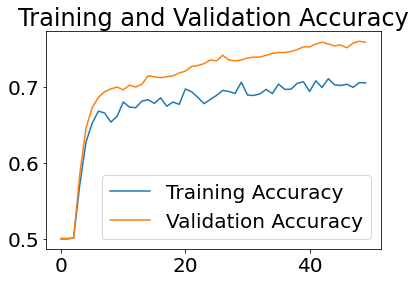

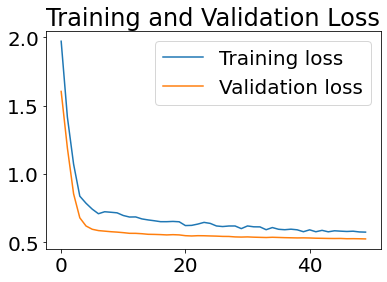

In [152]:
#summarize accuracy & loss

acc = ANN3_bal.history['accuracy']
val_acc = ANN3_bal.history['val_accuracy']

loss = ANN3_bal.history['loss']
val_loss = ANN3_bal.history['val_loss']
epochs = range(len(acc))

# ANN1_bal_data = {"epoch": epochs, "accuracy": acc, "validation accuracy": val_acc, "loss": loss, "validation loss": val_loss}
# ANN1_bal_training = pd.DataFrame(cnn1_data)
# ANN1_bal_training.to_csv('/kaggle/working/CNN1_training.csv',index=False)

#fig, axs = plt.subplots(2, figsize=(10, 10))
plt.rc('font', size=20) 
plt.plot(epochs, acc, label = "Training Accuracy"),
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_accuracy.png')
plt.show()
#axs[0,0] = plt.show()
plt.plot(epochs, loss, label = "Training loss"),
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_loss.png')
plt.show()

26/26 [==============================] - 0s 4ms/step


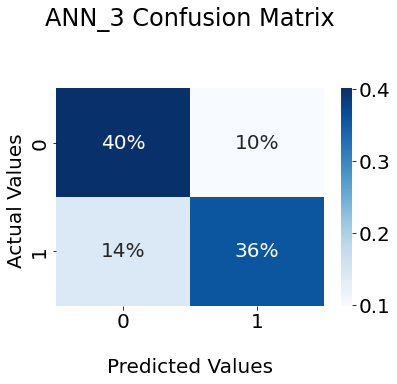

In [236]:
y_pred_ANN3 = model3.predict(X_val)
y_pred_ANN3 = (y_pred_ANN3> 0.5).astype(int)
#plotting Confusion Matrix
cf_matrix_ANN3 = confusion_matrix(y_val, y_pred_ANN3)


ax = sns.heatmap(cf_matrix_ANN3/np.sum(cf_matrix_ANN3), annot=True,fmt='.0%', cmap='Blues')
ax.set_title('ANN_3 Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [154]:
print('Accuracy Score : ' + str(round(accuracy_score(y_val,y_pred_ANN3),3)))
print('Precision Score : ' + str(round(precision_score(y_val,y_pred_ANN3),3)))
print('Recall Score : ' + str(round(recall_score(y_val,y_pred_ANN3),3)))
print('F-Score : ' + str(round(f1_score(y_val,y_pred_ANN3),3)))

Accuracy Score : 0.758
Precision Score : 0.782
Recall Score : 0.715
F-Score : 0.747


# Model 4

In this iteration I tested out a different final activation function of Sigmoid. It again provided comparable accuracy, but increased the False negative rate and resulted in a lower recall rate. Given the nature of this business problem, having a higher false negative rate is detrimental for the company to be able to catch and perform preventative actions of customers leaving the company so I reverted the final activation function back to Tanh.

In [266]:
model4 = Sequential(
    [#input layer
    Input(shape = (13,)),

    #hidden layer
    Dense(7, activation ='relu',  kernel_initializer = 'normal'),
    Dense(3, activation ='relu',  kernel_initializer = 'normal'),
    #can add normalization later

    #transition to Neural Network
    Flatten(),
    #output layer
    Dense(1, activation = 'sigmoid',  kernel_initializer = 'normal')
    ])

model4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model4.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_119 (Dense)           (None, 7)                 98        
                                                                 
 dense_120 (Dense)           (None, 3)                 24        
                                                                 
 flatten_38 (Flatten)        (None, 3)                 0         
                                                                 
 dense_121 (Dense)           (None, 1)                 4         
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [267]:
ANN4_bal = model4.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
102/102 [==============================] - 5s 13ms/step - loss: 0.6919 - accuracy: 0.5888 - val_loss: 0.6882 - val_accuracy: 0.6834
Epoch 2/50
102/102 [==============================] - 1s 6ms/step - loss: 0.6688 - accuracy: 0.7011 - val_loss: 0.6463 - val_accuracy: 0.6699
Epoch 3/50
102/102 [==============================] - 1s 6ms/step - loss: 0.6085 - accuracy: 0.7060 - val_loss: 0.5985 - val_accuracy: 0.6785
Epoch 4/50
102/102 [==============================] - 1s 6ms/step - loss: 0.5724 - accuracy: 0.7140 - val_loss: 0.5868 - val_accuracy: 0.6908
Epoch 5/50
102/102 [==============================] - 1s 6ms/step - loss: 0.5626 - accuracy: 0.7199 - val_loss: 0.5831 - val_accuracy: 0.6982
Epoch 6/50
102/102 [==============================] - 0s 5ms/step - loss: 0.5580 - accuracy: 0.7171 - val_loss: 0.5793 - val_accuracy: 0.6994
Epoch 7/50
102/102 [==============================] - 1s 6ms/step - loss: 0.5536 - accuracy: 0.7214 - val_loss: 0.5759 - val_accuracy: 0.6994
Epoch

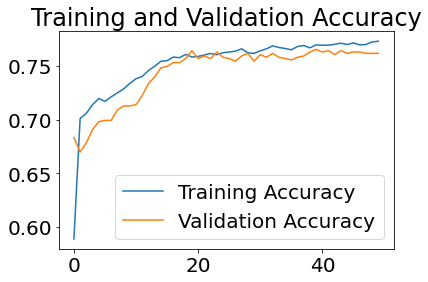

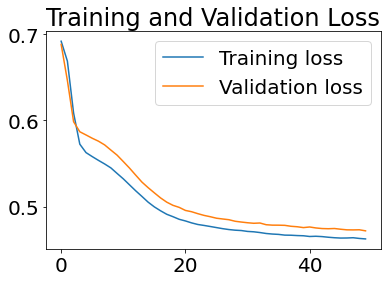

In [268]:
#summarize accuracy & loss

acc = ANN4_bal.history['accuracy']
val_acc = ANN4_bal.history['val_accuracy']

loss = ANN4_bal.history['loss']
val_loss = ANN4_bal.history['val_loss']
epochs = range(len(acc))

# ANN1_bal_data = {"epoch": epochs, "accuracy": acc, "validation accuracy": val_acc, "loss": loss, "validation loss": val_loss}
# ANN1_bal_training = pd.DataFrame(cnn1_data)
# ANN1_bal_training.to_csv('/kaggle/working/CNN1_training.csv',index=False)

#fig, axs = plt.subplots(2, figsize=(10, 10))
plt.rc('font', size=20) 
plt.plot(epochs, acc, label = "Training Accuracy"),
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_accuracy.png')
plt.show()
#axs[0,0] = plt.show()
plt.plot(epochs, loss, label = "Training loss"),
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_loss.png')
plt.show()

26/26 [==============================] - 0s 5ms/step


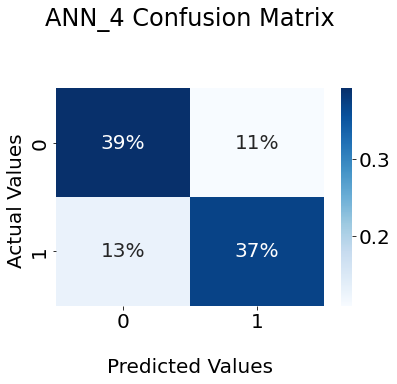

In [269]:
y_pred_ANN4 = model4.predict(X_val)
y_pred_ANN4 = (y_pred_ANN4> 0.5).astype(int)
#plotting Confusion Matrix
cf_matrix_ANN4 = confusion_matrix(y_val, y_pred_ANN4)


ax = sns.heatmap(cf_matrix_ANN4/np.sum(cf_matrix_ANN4), annot=True,fmt='.0%', cmap='Blues')
ax.set_title('ANN_4 Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [270]:
print('Accuracy Score : ' + str(round(accuracy_score(y_val,y_pred_ANN4),3)))
print('Precision Score : ' + str(round(precision_score(y_val,y_pred_ANN4),3)))
print('Recall Score : ' + str(round(recall_score(y_val,y_pred_ANN4),3)))
print('F-Score : ' + str(round(f1_score(y_val,y_pred_ANN4),3)))

Accuracy Score : 0.762
Precision Score : 0.772
Recall Score : 0.742
F-Score : 0.757


# Model 5

Different optimizers were tested including SGD, RMSprop, adadelta, and Nadam (Adam + Nesterov momentum). Nadam was the only alternate optimizer that produced comparable results to the original slotted optimizer (Adam). At its default hyperparameters set, it performed at a similar level to the Adam optimizer but anything so far hasn't significantly increased performance of the model.

I started to suspect the performance improvement was plateauing due to the limited amount of data being trained on. The significant reduction in total observations in order to maintain a balanced dataset was starting to affect the model's ability to learn from. I decided to stop here for the sake of this project, but future explorations could include looking into data augmentation to artificially increase positive observation counts. 

In [252]:
model5 = Sequential(
    [#input layer
    Input(shape = (13,)),
    

    #hidden layer
    Dense(7, activation ='relu',  kernel_initializer = 'normal'),
    # Dropout(rate = 0.1),
    # BatchNormalization(),
    Dense(3, activation ='relu',  kernel_initializer = 'normal'),
    # Dropout(rate = 0.1),
    # BatchNormalization(),
    #can add normalization later

    #transition to Neural Network
    Flatten(),
    #output layer
    Dense(1, activation = 'tanh',  kernel_initializer = 'normal')
    ])

model5.compile(optimizer = 'nadam', loss = 'binary_crossentropy', metrics = ['accuracy',"binary_crossentropy", keras.metrics.Recall()])

model5.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_113 (Dense)           (None, 7)                 98        
                                                                 
 dense_114 (Dense)           (None, 3)                 24        
                                                                 
 flatten_36 (Flatten)        (None, 3)                 0         
                                                                 
 dense_115 (Dense)           (None, 1)                 4         
                                                                 
Total params: 126 (504.00 Byte)
Trainable params: 126 (504.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [253]:
ANN5_bal = model5.fit(X_train, y_train, epochs = 50, validation_data = (X_val, y_val))

Epoch 1/50
102/102 [==============================] - 12s 16ms/step - loss: 2.2854 - accuracy: 0.4998 - binary_crossentropy: 2.2854 - recall_3: 0.0000e+00 - val_loss: 1.5856 - val_accuracy: 0.5006 - val_binary_crossentropy: 1.5856 - val_recall_3: 0.0000e+00
Epoch 2/50
102/102 [==============================] - 1s 8ms/step - loss: 1.2377 - accuracy: 0.4998 - binary_crossentropy: 1.2377 - recall_3: 0.0000e+00 - val_loss: 0.9757 - val_accuracy: 0.5006 - val_binary_crossentropy: 0.9757 - val_recall_3: 0.0000e+00
Epoch 3/50
102/102 [==============================] - 1s 7ms/step - loss: 0.8127 - accuracy: 0.5152 - binary_crossentropy: 0.8127 - recall_3: 0.0344 - val_loss: 0.7079 - val_accuracy: 0.5571 - val_binary_crossentropy: 0.7079 - val_recall_3: 0.1229
Epoch 4/50
102/102 [==============================] - 1s 12ms/step - loss: 0.6416 - accuracy: 0.6293 - binary_crossentropy: 0.6416 - recall_3: 0.3325 - val_loss: 0.6159 - val_accuracy: 0.6528 - val_binary_crossentropy: 0.6159 - val_recall

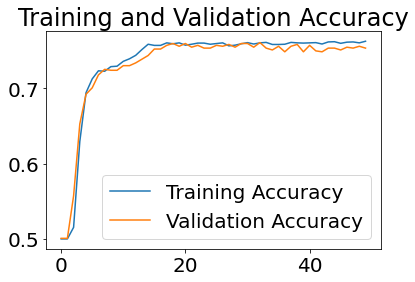

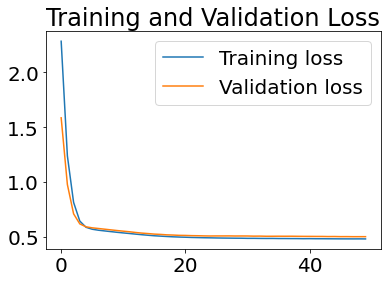

In [254]:
#summarize accuracy & loss

acc = ANN5_bal.history['accuracy']
val_acc = ANN5_bal.history['val_accuracy']

loss = ANN5_bal.history['loss']
val_loss = ANN5_bal.history['val_loss']
epochs = range(len(acc))

# ANN1_bal_data = {"epoch": epochs, "accuracy": acc, "validation accuracy": val_acc, "loss": loss, "validation loss": val_loss}
# ANN1_bal_training = pd.DataFrame(cnn1_data)
# ANN1_bal_training.to_csv('/kaggle/working/CNN1_training.csv',index=False)

#fig, axs = plt.subplots(2, figsize=(10, 10))
plt.rc('font', size=20) 
plt.plot(epochs, acc, label = "Training Accuracy"),
plt.plot(epochs, val_acc, label = "Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_accuracy.png')
plt.show()
#axs[0,0] = plt.show()
plt.plot(epochs, loss, label = "Training loss"),
plt.plot(epochs, val_loss, label = "Validation loss")
plt.title("Training and Validation Loss")
plt.legend()
#plt.savefig('/kaggle/working/CNN1_loss.png')
plt.show()

26/26 [==============================] - 0s 7ms/step


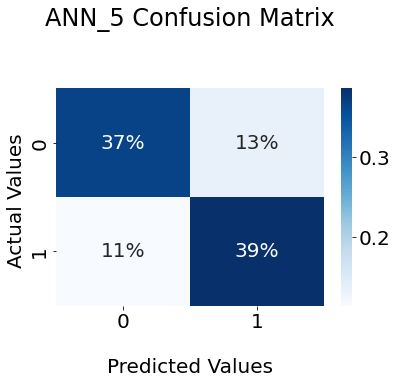

In [255]:
y_pred_ANN5 = model5.predict(X_val)
y_pred_ANN5 = (y_pred_ANN5> 0.5).astype(int)
#plotting Confusion Matrix
cf_matrix_ANN5 = confusion_matrix(y_val, y_pred_ANN5)


ax = sns.heatmap(cf_matrix_ANN5/np.sum(cf_matrix_ANN5), annot=True,fmt='.0%', cmap='Blues')
ax.set_title('ANN_5 Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1'])
ax.yaxis.set_ticklabels(['0','1'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [256]:
print('Accuracy Score : ' + str(round(accuracy_score(y_val,y_pred_ANN5),3)))
print('Precision Score : ' + str(round(precision_score(y_val,y_pred_ANN5),3)))
print('Recall Score : ' + str(round(recall_score(y_val,y_pred_ANN5),3)))
print('F-Score : ' + str(round(f1_score(y_val,y_pred_ANN5),3)))

Accuracy Score : 0.753
Precision Score : 0.743
Recall Score : 0.774
F-Score : 0.758


# Results and Analysis

A number of different models were run to create a predictive model that determine whether a customer was at risk for churning from the company's services or would continue to keep their business with the bank. Various hyperparameter tuning, different architectures, and application of other techniques were utilized to improve output and overall performance (measured by accuracy and F1 score). A summary of the hyperparameter tuning and results can be found in the table below.

In all, over 10 iterations of models were trained, a majority with information on roughly 3200 customers. The original dataset had 10,000 customer's information, however the distribution of churned vs retained customers was heavily weigted towards retained customers. After initial training, it was determined the sacrifice of a larger dataset was worth the better performance in false negative detection and therefore following model iterations were trained with the smaller balanced dataset.  The baseline architecture was a simple 3 layer neural network: Input, Hidden, Ouput. This contributed a decent score of 73 for both accuracy and F1-score. In the next iteration, I added a hidden layer to the architecture which improved performance scores by 3-4% for both metrics.

From there, I experimented with regularization techniques. At first, I wanted to implement L1 regularization to help makes some features obsolete by shrinking their weights to ~0. The reasoning was during initial EDA I had noticed that some features did not seem to have any effect on the target attribut. Unfortunately, performance metrics of those models performed very poorly (~50% accuracy). Secondarily, I tried adding a dropout layer in between the hidden layers. The model ended up with better performance on validation data compared to the training data. During my research I found it was likely due to the effect of the dropout layer. During training the accuracy is calculated with activated dropout which can end up lowering it to some degree. However, when evaluating validation accuracy, dropout is NOT active so the model is actually performing better. Despite comparable accuracy with the previous unregularized model, the confusion matrix indicates an increased false negative rate and decreased false positive rate. This would mean the company would have a higher rate of missing individuals that were giving indications of churning. That observation coupled with the higher noise levels in accuracy and loss functions steered me away from implementing dropout for following model implementations.

I then adjusted the final activation function to Sigmoid in efforts to increase overall accuracy. The performance was comparable to the original final activation function but resulted in noisy accuracy and loss functions when plotted so I reverted back to Tanh.

Lastly, I experimented with the optimizer between 4 different options. All but 1 produced worse results that indicated the model was just guessing "churned" for every observation instead of learning from the data. The only optimizer that produced comparable results was Nadam which is very similar to the original optimizer Adam with the addition of Nesterov momentum. Since it produced comparable results, I decided to revert back to the original optimizer.

At this point I started to suspect that the performance improvement was plateauing due to the limited amount of data being trained on i.e the significant reduction in total observations to maintain a balanced dataset was starting to affect the model's ability to learn. I decided to stop here for the sake of this project, but future explorations could include looking into data augmentation to artificially increase positive observation counts. 

In [272]:
model_sum = pd.DataFrame({
 'Architecture':['Model 1 Bal','Model 1 Skew','Model 2','Model 3 Dropout',
                 'Model 3 L1','Model 4','Model 5 SGD', 'Model 5 RMSprop',
                 'Model 5 Adadelta','Model 5 Nadam'],
 '# of hidden layers':[1,1,2,2,
                  2,2,2,2,
                  2,2],
 'Dataset':['Balanced', 'Skewed','Balanced','Balanced',
            'Balanced','Balanced','Balanced','Balanced',
            'Balanced','Balanced' ],
 'Final Acitivation Function':['Tanh','Tanh','Tanh','Tanh',
             'Tanh','Sigmoid','Tanh','Tanh',
             'Tanh','Tanh'],
 'Optimizer':['Adam','Adam','Adam','Adam',
              'Adam','Adam','SGD','RMSprop',
              'AdaDelta','Nadam'],
 'Epochs':[30,30,50,50,
           50,50,50,50,
           50,50],
'Regularization':['n/a','n/a','n/a','Dropout','L1',
                  'n/a','n/a','n/a','n/a',
                  'n/a'],

 "Accuracy":[73,50,76,76,
             50,76, 55, 57,
             53 , 75],
"F1 score":[73,32,77,75,
             '-',76, 66, 67,
             63 , 76],

 "Rank":[5,9,1,4,
         10,2,7,6,
         8,3]

 })

model_sum

,Architecture,# of hidden layers,Dataset,Final Acitivation Function,Optimizer,Epochs,Regularization,Accuracy,F1 score,Rank
0,Model 1 Bal,1,Balanced,Tanh,Adam,30,n/a,73,73,5
1,Model 1 Skew,1,Skewed,Tanh,Adam,30,n/a,50,32,9
2,Model 2,2,Balanced,Tanh,Adam,50,n/a,76,77,1
3,Model 3 Dropout,2,Balanced,Tanh,Adam,50,Dropout,76,75,4
4,Model 3 L1,2,Balanced,Tanh,Adam,50,L1,50,-,10
5,Model 4,2,Balanced,Sigmoid,Adam,50,n/a,76,76,2
6,Model 5 SGD,2,Balanced,Tanh,SGD,50,n/a,55,66,7
7,Model 5 RMSprop,2,Balanced,Tanh,RMSprop,50,n/a,57,67,6
8,Model 5 Adadelta,2,Balanced,Tanh,AdaDelta,50,n/a,53,63,8
9,Model 5 Nadam,2,Balanced,Tanh,Nadam,50,n/a,75,76,3


# Conclusion

In this project, I attempted to create an Artifical Neural Network to predict whether or not a customer is at risk to churn from the company. The initial implmentation utilizes a simple ANN architecture to perform these predictions based on cutomer information that includes gender, age, company tenure, their credit score, and more. Hyperparameters and additional techniques that were taken into consideration for optimization included:
* Artifical Neural Network Architecture
* Dataset balance
* Regularization
* Activation Functions
* Model optimizer

Given the time to experiment as part of the final assignment for the University of Colorado, Boulder course "Introduction to Deep Learning", most of the optimization procedure pointed to a lot of the baseline implementation performing well. This set us at a decent baseline performance accuracy and F1-score of 73. The main improvers I was able to identify as part of my experimentation was the addition of a hidden layer in the architecture. The added hidden layer added another step for the model to learn more about the characteristics and patterns in the data.  From here, adding the second hidden layer increased the performance accuracy to 76 and F1-score to 77. 

Most of the following model iterations either performed comparably or worse than the 2nd model. During this time I did notice despite comparable accuracy, some hyperparameter tuning increased the False negative rate and resulted in a lower recall rate. Given the nature of this business problem, I decided having a higher false negative rate is detrimental for the company to be able to catch and perform preventative actions of customers leaving the company. This is also why I expanded the evaluation metrics to look at more than just the accuracy of the model. 

At the end of training the 5th model I suspected that the performance improvement was plateauing due to the limited amount of data being trained on. By forcing a 50/50 distribution on the training data, I ended up with a significantly reduced dataset, less than half of the original count. For this project, I accepted the drawbacks of using the smaller dataset to capture better recall and F1-score due to the weight missing False negative had on this business problem. In the future, I'd like to eperiment with implementing categorical augmentation to equalize the churned customer counts with retained customer counts, while maintaining the similar statisical properties. This augmentation was implemented from Egor Korneev's Towards Data Science article *Augmenting categorical datasets with synthetic data for machine learning* and I hope to incorporate it to these models at some point.. 

With the best model scoring with 76 accuracy and 77 F1-score, the model performed acceptably for this assignment. There is still room for improvement to be made in this model and in the future I would like the try out the following optimizations:
* Categorical Augmentation implementation 

w/ above implementation
* different architecture
* alternate optimizers
* Adjusting presaved models
* different regularization techniques

Additonally, when looking at others who have utilized this dataset it seems there are opportunities to explore other algorithims that may perform better than an artifical neural network for this business case. Doing some future cross validation on different methods would also be interesting.

Thank you for taking time to look at my notebook.







# References
* [Augmenting Categorical Data](https://towardsdatascience.com/augmenting-categorical-datasets-with-synthetic-data-for-machine-learning-a25095d6d7c8)
* [Implementation of ANN in python](https://www.mltut.com/implementation-of-artificial-neural-network-in-python/)
* [Nitesh Yadav's example customer churn ANN notebook](https://www.kaggle.com/code/niteshyadav3103/customer-churn-prediction-using-ann)
* [ELIŠKA BLÁHOVÁ's example customer churn notebook](https://www.kaggle.com/code/elisthefox/churn-analytics-should-i-stay-or-should-i-go#5.-Results-evaluation)